In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.tokenize import word_tokenize,RegexpTokenizer
from nltk.stem import WordNetLemmatizer,SnowballStemmer
from nltk.corpus import stopwords
import re
import string
from wordcloud import WordCloud, STOPWORDS

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import DataSet
review = pd.read_csv(r"C:\Users\aksha\Desktop\Internship\Ai Varient\Hotel Review NLP\hotel_reviews.csv" , encoding='unicode_escape')
review

,Review,Rating,@
0,nice hotel expensive parking got good deal sta...,4,NaN
1,ok nothing special charge diamond member hilto...,2,NaN
2,nice rooms not 4* experience hotel monaco seat...,3,NaN
3,"unique, great stay, wonderful time hotel monac...",5,NaN
4,"great stay great stay, went seahawk game aweso...",5,NaN
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,NaN
20487,great location price view hotel great quick pl...,4,NaN
20488,"ok just looks nice modern outside, desk staff ...",2,NaN
20489,hotel theft ruined vacation hotel opened sept ...,1,NaN


In [3]:
review

,Review,Rating,@
0,nice hotel expensive parking got good deal sta...,4,NaN
1,ok nothing special charge diamond member hilto...,2,NaN
2,nice rooms not 4* experience hotel monaco seat...,3,NaN
3,"unique, great stay, wonderful time hotel monac...",5,NaN
4,"great stay great stay, went seahawk game aweso...",5,NaN
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,NaN
20487,great location price view hotel great quick pl...,4,NaN
20488,"ok just looks nice modern outside, desk staff ...",2,NaN
20489,hotel theft ruined vacation hotel opened sept ...,1,NaN


# Exploratory Data Analysis

In [4]:
review.shape

(20491, 3)

In [5]:
# Check DataTypes and Information
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  20491 non-null  object 
 1   Rating  20491 non-null  int64  
 2   @       0 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 480.4+ KB


In [6]:
# Find Null Values
review.isnull().sum()

Review        0
Rating        0
@         20491
dtype: int64

In [7]:
# Remove Unnessary Column
review = review.drop(['@'],axis=1)
review

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [8]:
review.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,20491.0,3.952223,1.23303,1.0,3.0,4.0,5.0,5.0


In [9]:
# Check Duplicates
review.duplicated().sum()

0

In [10]:
review.columns

Index(['Review', 'Rating'], dtype='object')

In [11]:
# How many Rating in Different Stars.
review['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

## Data Visualization 

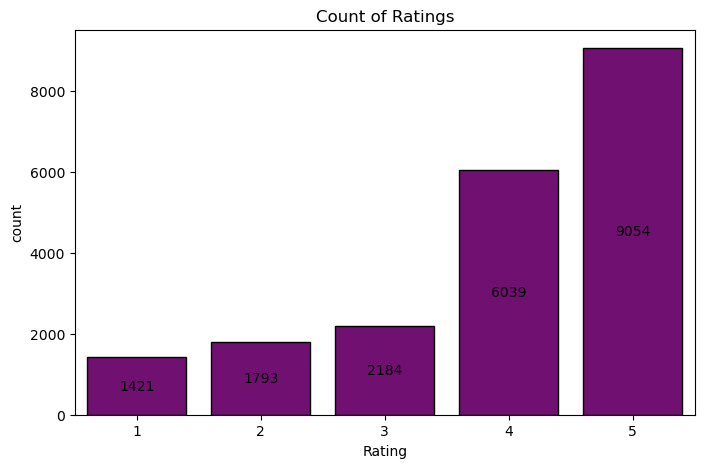

In [12]:
plt.figure(figsize=(8,5))

ax = sns.countplot(data = review , x = 'Rating', edgecolor='black', linewidth=1 ,color='purple')

for i in ax.containers:
    ax.bar_label(i, label_type='center')

plt.title('Count of Ratings')
plt.show()

Text(0.5, 1.0, 'RATING')

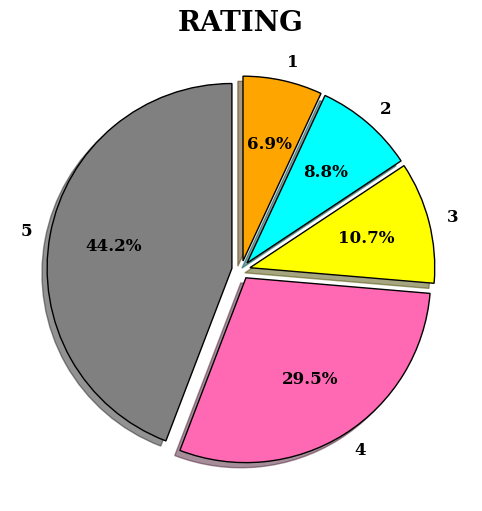

In [13]:
label_data= review['Rating'].value_counts()
labels_name = ['5','4','3','2','1']
explode=(0.05,0.05,0.05,0.05,0.05)  # for separate from centre
plt.figure(figsize=(8,6))
patches, texts, pcts= plt.pie(label_data, labels= labels_name, colors=['gray','hotpink','yellow','cyan','orange'], pctdistance=0.65,shadow=True,
                             startangle=90, explode=explode, autopct='%1.1f%%',
                             textprops={'fontsize':12,'color':'black','weight':'bold','family':'serif'},
                                        wedgeprops = {"edgecolor" : "black"})
plt.setp(pcts,color='black')
hfont={'weight':'bold','family':'serif'}
plt.title('RATING',size=20,**hfont)

In [14]:
# Find Word Counts, Character Counts, Sentence Counts.
review['word_count'] = review['Review'].apply(lambda x: len(str(x).split()))

def char_count(x):
    s = x.split()
    x = ''.join(s)
    return len(x)
review['char_count'] = review['Review'].apply(lambda x: char_count(x))

review['sent_count'] = review['Review'].apply(lambda x: len(x.split('.')))

review

,Review,Rating,word_count,char_count,sent_count
0,nice hotel expensive parking got good deal sta...,4,87,505,1
1,ok nothing special charge diamond member hilto...,2,250,1438,5
2,nice rooms not 4* experience hotel monaco seat...,3,217,1209,8
3,"unique, great stay, wonderful time hotel monac...",5,89,510,1
4,"great stay great stay, went seahawk game aweso...",5,191,1089,2
...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,109,623,1
20487,great location price view hotel great quick pl...,4,39,266,5
20488,"ok just looks nice modern outside, desk staff ...",2,63,379,3
20489,hotel theft ruined vacation hotel opened sept ...,1,781,4775,17


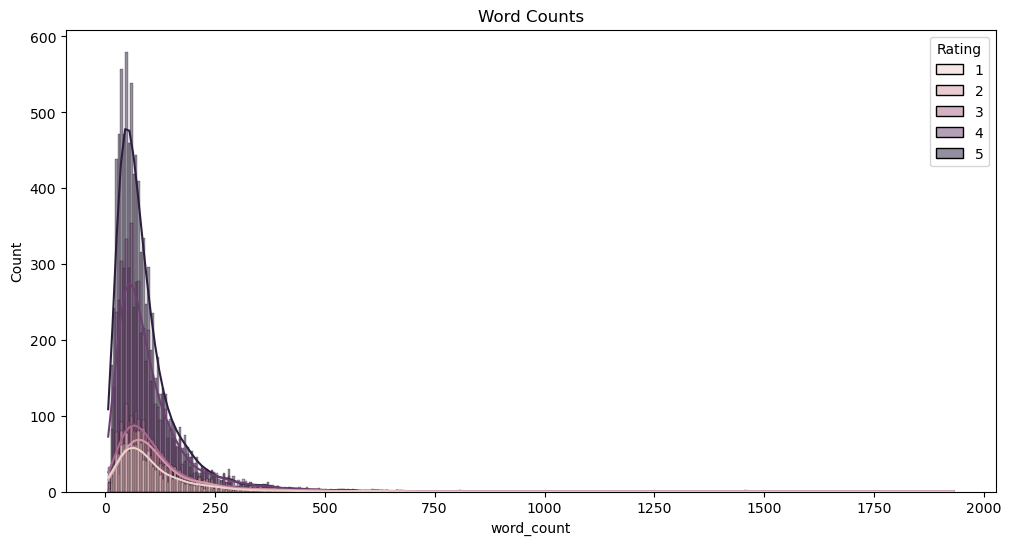

In [15]:
plt.figure(figsize=(12,6))

sns.histplot(data=review, x ='word_count', hue='Rating' ,kde=True)
plt.title('Word Counts')
plt.show()

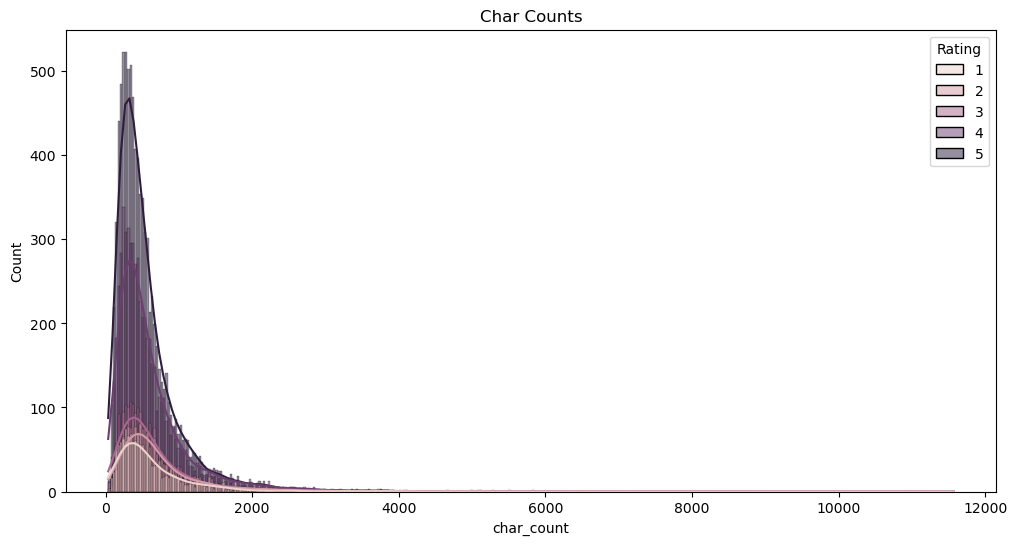

In [16]:
plt.figure(figsize=(12,6))

sns.histplot(data=review, x ='char_count', hue='Rating' ,kde=True)
plt.title('Char Counts')
plt.show()

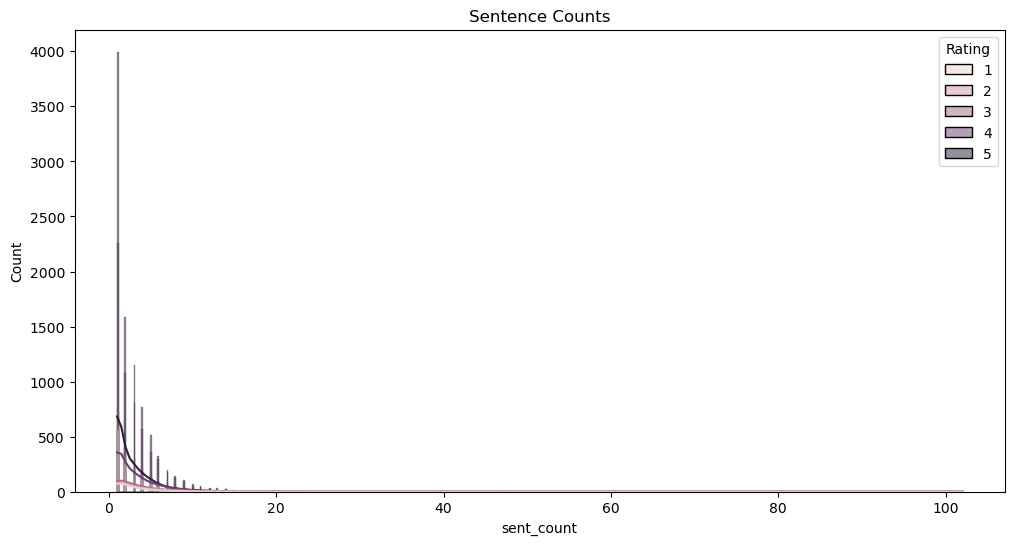

In [17]:
plt.figure(figsize=(12,6))

sns.histplot(data=review, x ='sent_count', hue='Rating' ,kde=True)
plt.title('Sentence Counts')
plt.show()

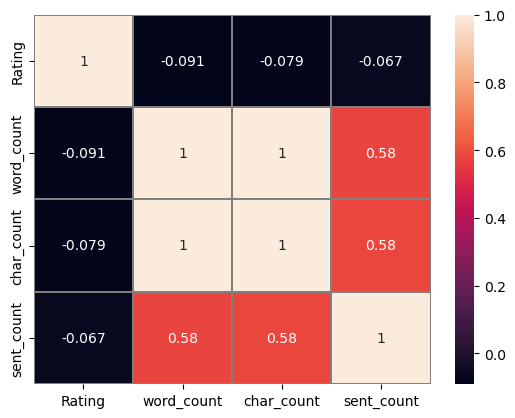

In [18]:
# Correlation Bewtween Counts.
corr = review.corr()
sns.heatmap(corr, annot=True, linewidths=0.05, linecolor='grey')
plt.show()

## Text Data Cleaning 

In [19]:
# Select only Review and Rating in Review Varaible
Review = review.iloc[:,0:2]

In [20]:
# Text Cleaning Functions
lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer('english') 
punc = string.punctuation
my_stopword = stopwords.words('english')
my_stopword.remove('not')

## Function to remove stopwords using NLTK

In [21]:
# Create function for Text Cleaning (Remove Numbers, Symbols, Punctuation, Stopwords, stemming, lemmetization)
def preprocess(data):
    data=str(data)
    data = data.lower()

    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', data)
    
    rem_num = re.sub('[0-9]+',' ', cleantext)
    rem_num = re.sub("_+",'not', rem_num)
    rem_num = re.sub('\\w\\d\\w','',rem_num)
    rem_num = re.sub("n't",'not', rem_num)
    
    
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    
    punc_word = [word for word in tokens if word not in punc]
    
    filtered_words = [word for word in punc_word if word not in my_stopword]
    
    stemming = [stemmer.stem(word) for word in filtered_words]
    
    lemma_words=[lemmatizer.lemmatize(word) for word in stemming]
    
    return " ".join(lemma_words)

## Function to remove stopwords using spaCy (For Additional Inforamtion)

In [22]:
# Using Lambda run multiple columns and rows.
Review['Text']=Review['Review'].apply(lambda x: preprocess(x))

In [23]:
Review

,Review,Rating,Text
0,nice hotel expensive parking got good deal sta...,4,nice hotel expens park got good deal stay hote...
1,ok nothing special charge diamond member hilto...,2,ok noth special charg diamond member hilton de...
2,nice rooms not 4* experience hotel monaco seat...,3,nice room not experi hotel monaco seattl good ...
3,"unique, great stay, wonderful time hotel monac...",5,uniqu great stay wonder time hotel monaco loca...
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,best kept secret rd time stay charm not star c...
20487,great location price view hotel great quick pl...,4,great locat price view hotel great quick place...
20488,"ok just looks nice modern outside, desk staff ...",2,ok look nice modern outsid desk staff not part...
20489,hotel theft ruined vacation hotel opened sept ...,1,hotel theft ruin vacat hotel open sept guest w...


In [24]:
# Function for Converting Ratings into Sentiment
def sentiment(data):
    if data in [1,2]:
        return 'Negative'
    elif data in [3]:
        return 'Neutral'
    elif data in [4,5]:
        return 'Positive'
    else:
        return 'Unknown'

In [25]:
Review['Sentiment'] = Review['Rating'].apply(lambda x: sentiment(x))
Review

,Review,Rating,Text,Sentiment
0,nice hotel expensive parking got good deal sta...,4,nice hotel expens park got good deal stay hote...,Positive
1,ok nothing special charge diamond member hilto...,2,ok noth special charg diamond member hilton de...,Negative
2,nice rooms not 4* experience hotel monaco seat...,3,nice room not experi hotel monaco seattl good ...,Neutral
3,"unique, great stay, wonderful time hotel monac...",5,uniqu great stay wonder time hotel monaco loca...,Positive
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...,Positive
...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,best kept secret rd time stay charm not star c...,Positive
20487,great location price view hotel great quick pl...,4,great locat price view hotel great quick place...,Positive
20488,"ok just looks nice modern outside, desk staff ...",2,ok look nice modern outsid desk staff not part...,Negative
20489,hotel theft ruined vacation hotel opened sept ...,1,hotel theft ruin vacat hotel open sept guest w...,Negative


In [26]:
# Count Value for differnt types of Sentiment
Sentiment = Review['Sentiment'].value_counts()

In [27]:
Sentiment

Positive    15093
Negative     3214
Neutral      2184
Name: Sentiment, dtype: int64

Text(0, 0.5, 'Count')

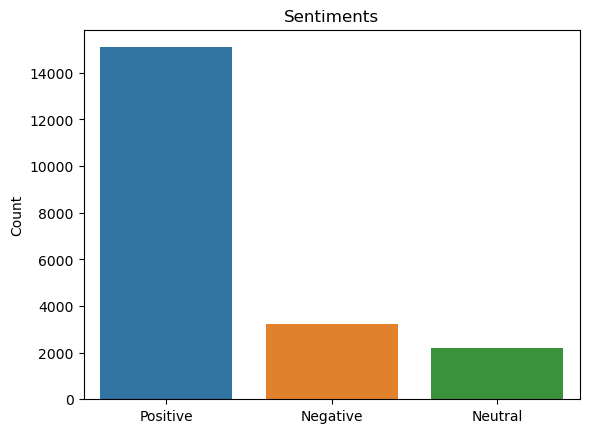

In [28]:
# Visualize Data of Sentiment Counts
sns.barplot(Sentiment.index, Sentiment)
plt.title("Sentiments")
plt.ylabel('Count')

In [29]:
Review

,Review,Rating,Text,Sentiment
0,nice hotel expensive parking got good deal sta...,4,nice hotel expens park got good deal stay hote...,Positive
1,ok nothing special charge diamond member hilto...,2,ok noth special charg diamond member hilton de...,Negative
2,nice rooms not 4* experience hotel monaco seat...,3,nice room not experi hotel monaco seattl good ...,Neutral
3,"unique, great stay, wonderful time hotel monac...",5,uniqu great stay wonder time hotel monaco loca...,Positive
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...,Positive
...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,best kept secret rd time stay charm not star c...,Positive
20487,great location price view hotel great quick pl...,4,great locat price view hotel great quick place...,Positive
20488,"ok just looks nice modern outside, desk staff ...",2,ok look nice modern outsid desk staff not part...,Negative
20489,hotel theft ruined vacation hotel opened sept ...,1,hotel theft ruin vacat hotel open sept guest w...,Negative


### Most Repeated Words (Before Cleaning Data)

In [30]:
rep_word_before = pd.Series(''.join(Review['Review']).split()).value_counts()[:10]
rep_word_before

hotel    42079
not      30750
room     30532
great    18732
n't      18436
staff    14950
good     14791
did      13433
just     12458
stay     11376
dtype: int64

Text(0, 0.5, 'Count')

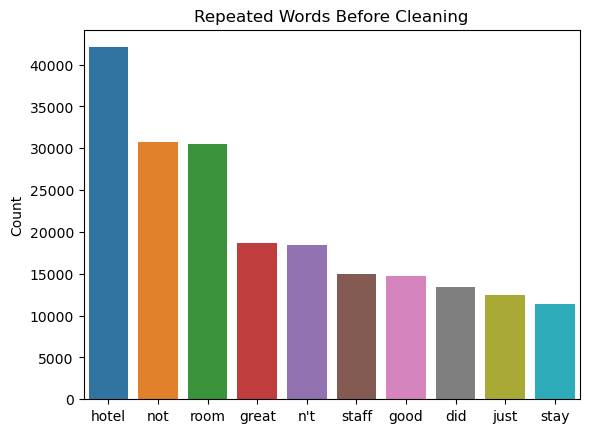

In [31]:
sns.barplot(rep_word_before.index, rep_word_before)
plt.title("Repeated Words Before Cleaning")
plt.ylabel('Count')

### Most Repeated Words (After Cleaning Data)

In [32]:
rep_word_after = pd.Series(''.join(Review['Text']).split()).value_counts()[:10]
rep_word_after

hotel    52572
not      49810
room     47540
stay     26736
great    18323
staff    16576
good     16399
night    14743
locat    13697
day      13343
dtype: int64

Text(0, 0.5, 'Count')

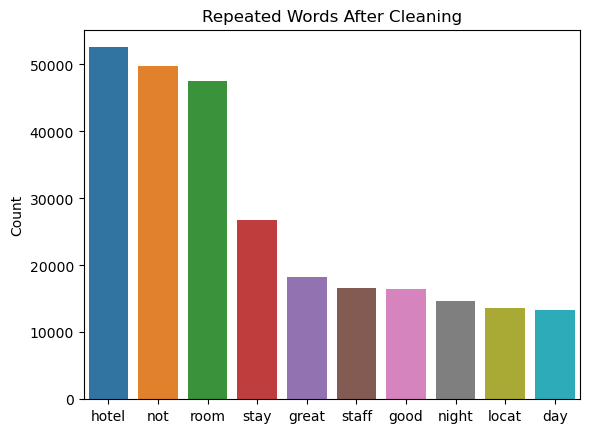

In [33]:
sns.barplot(rep_word_after.index, rep_word_after)
plt.title("Repeated Words After Cleaning")
plt.ylabel('Count')

## Wordcloud

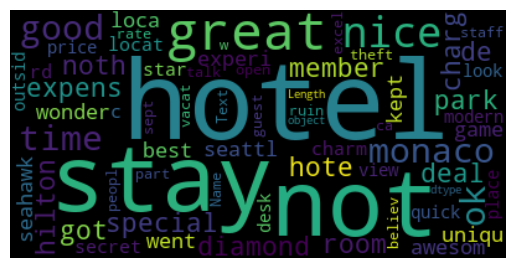

In [34]:
# Wordcloud Shows Summary of Dataset
wc = WordCloud(background_color='Black', stopwords= my_stopword).generate(str(Review['Text']))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [35]:
Positive = Review[Review['Sentiment'] == 'Positive']
Neutral = Review[Review['Sentiment'] == 'Neutral']
Negative = Review[Review['Sentiment'] == 'Negative']

In [36]:
# Create Function for Different sentiments Wordcloud
def wordcl(data,title):
    stop = my_stopword
    wc = WordCloud(background_color='Black',stopwords=stop).generate(data)
    plt.imshow(wc)
    plt.axis('off')
    plt.title(title)

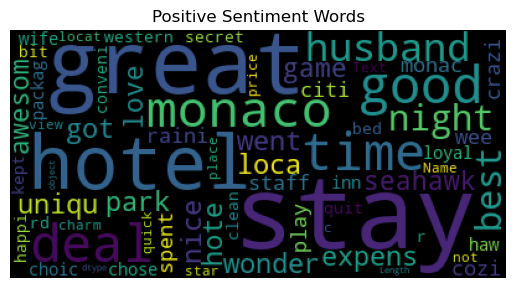

In [37]:
# Positive Reviews Wordcloud
wordcl(str(Positive['Text']), 'Positive Sentiment Words')

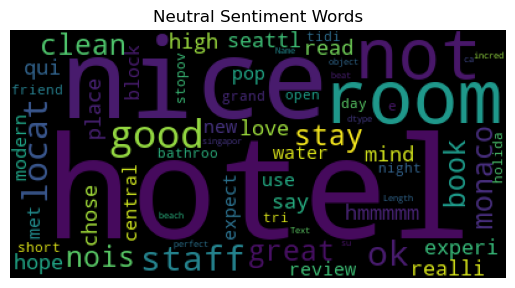

In [38]:
# Neutral Reviews Wordcloud
wordcl(str(Neutral['Text']), 'Neutral Sentiment Words')

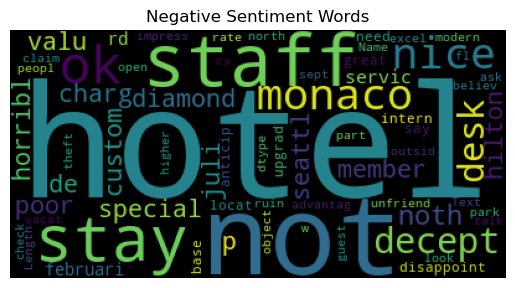

In [39]:
# Negative Reviews Wordcloud
wordcl(str(Negative['Text']), 'Negative Sentiment Words')

## Polarity Detect using N_gram 

In [40]:
# Create Function for Run Different types of N_gram (Bi-Gram, Tri-Gram)
def get_top_words(data, n, ngram_range, col1):
    vec1 = CountVectorizer(ngram_range=ngram_range, max_features=52562).fit(data)
    bow = vec1.transform(data)
    addition_word = bow.sum(axis=0)
    freq = [(word, addition_word[0,idx])for word, idx in vec1.vocabulary_.items()]
    freq = sorted(freq, key=lambda x: x[1], reverse=True)
    result = pd.DataFrame(freq[:n], columns=[col1, 'Freq'])
    return result

In [41]:
# Bi-Gram 
Bigram = get_top_words(Review['Text'], 10,(2,2),'Bigram')
# Tri-Gram
Trigram = get_top_words(Review['Text'], 10,(3,3),'Trigram')
# Positive Review Bi-gram
Positive_bigram = get_top_words(Positive['Text'], 10,(2,2),'Bigram')
# Neutral Review Bi-gram
Neutral_bigram = get_top_words(Neutral['Text'], 10,(2,2),'Bigram')
# Negative Review Bi-gram
Negative_bigram = get_top_words(Negative['Text'], 10,(2,2),'Bigram')
# Positive Review Tri-Gram
Positive_Trigram = get_top_words(Positive['Text'], 10,(3,3),'Trigram')
# Neutral Review Tri-Gram
Neutral_Trigram = get_top_words(Neutral['Text'], 10,(3,3),'Trigram')
# Negative Review Tri-Gram
Negative_Trigram = get_top_words(Negative['Text'], 10,(3,3),'Trigram')

#### Top 10 Repeated Words in N_grams (Polarity)

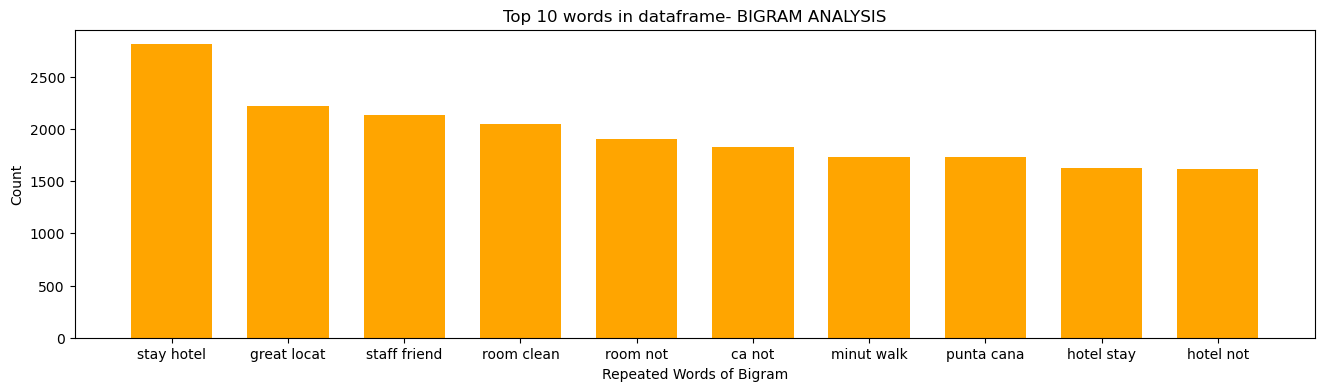

In [42]:
# Top 10 Bi-gram Words
plt.figure(figsize=(16,4))
plt.bar(Bigram['Bigram'],Bigram['Freq'], color = 'orange',
        width = 0.7)
plt.xlabel("Repeated Words of Bigram")
plt.ylabel("Count")
plt.title("Top 10 words in dataframe- BIGRAM ANALYSIS")
plt.show()

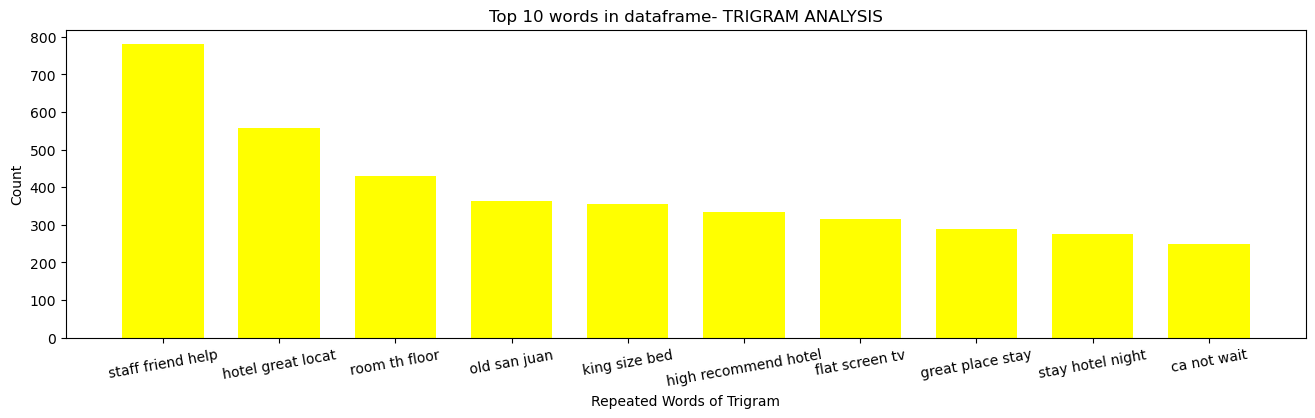

In [43]:
# Top 10 Tri-gram Words
plt.figure(figsize=(16,4))
plt.bar(Trigram['Trigram'],Trigram['Freq'], color ='Yellow',
        width = 0.7)
plt.xlabel("Repeated Words of Trigram")
plt.ylabel("Count")
plt.title("Top 10 words in dataframe- TRIGRAM ANALYSIS")
plt.xticks(rotation = 10)
plt.show()

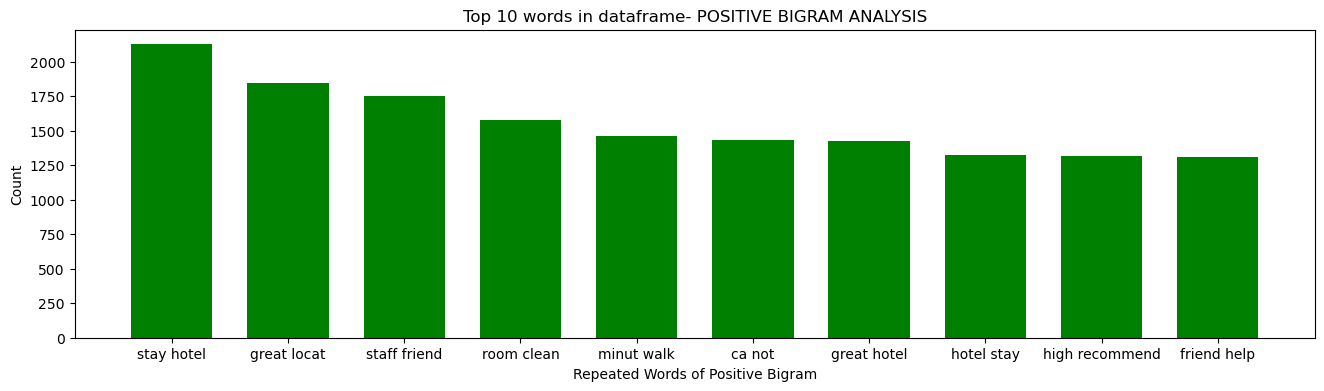

In [44]:
# Top 10 Positive Bi-gram Words
plt.figure(figsize=(16,4))
plt.bar(Positive_bigram['Bigram'],Positive_bigram['Freq'], color ='green',
        width = 0.7)
plt.xlabel("Repeated Words of Positive Bigram")
plt.ylabel("Count")
plt.title("Top 10 words in dataframe- POSITIVE BIGRAM ANALYSIS")
plt.show()

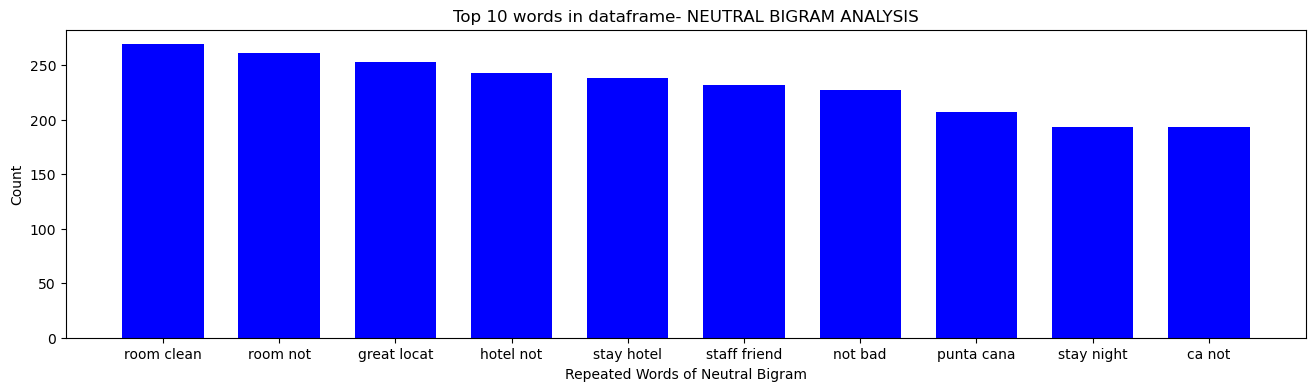

In [45]:
# Top 10 Neutral Bi-gram Words
plt.figure(figsize=(16,4))
plt.bar(Neutral_bigram['Bigram'],Neutral_bigram['Freq'], color ='blue',
        width = 0.7)
plt.xlabel("Repeated Words of Neutral Bigram")
plt.ylabel("Count")
plt.title("Top 10 words in dataframe- NEUTRAL BIGRAM ANALYSIS")
plt.show()

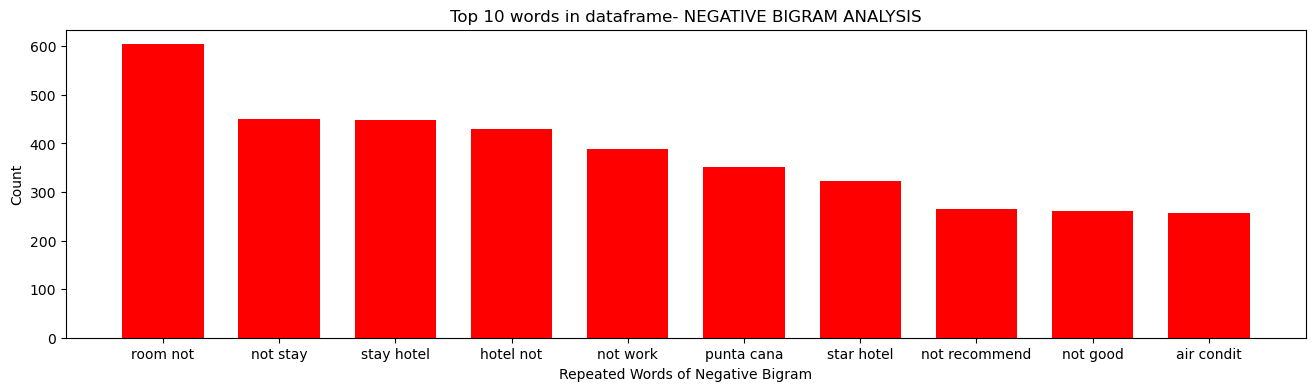

In [46]:
# Top 10 Negative Bi-gram Words
plt.figure(figsize=(16,4))
plt.bar(Negative_bigram['Bigram'],Negative_bigram['Freq'], color ='Red',
        width = 0.7)
plt.xlabel("Repeated Words of Negative Bigram")
plt.ylabel("Count")
plt.title("Top 10 words in dataframe- NEGATIVE BIGRAM ANALYSIS")
plt.show()

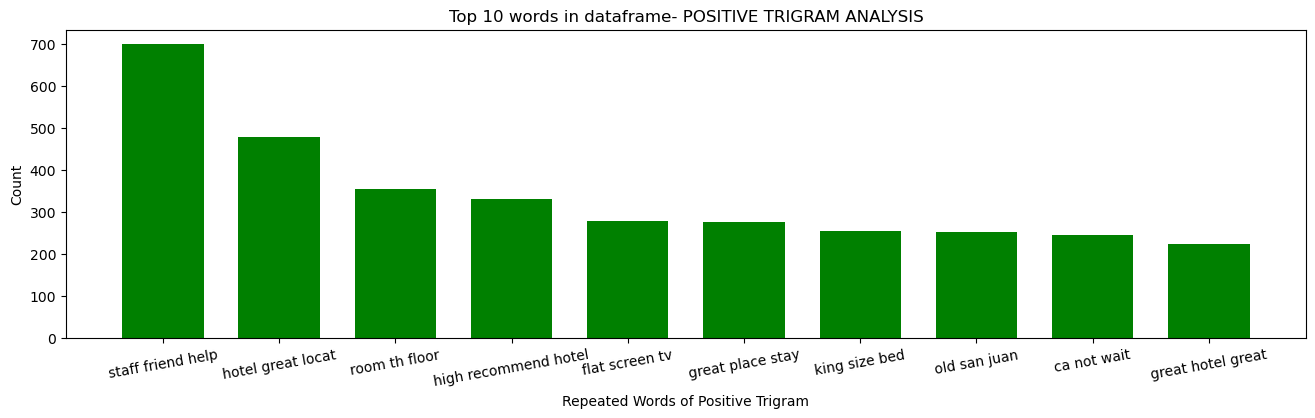

In [47]:
# Top 10 Positive Tri-gram Words
plt.figure(figsize=(16,4))
plt.bar(Positive_Trigram['Trigram'],Positive_Trigram['Freq'], color ='green',
        width = 0.7)
plt.xlabel("Repeated Words of Positive Trigram")
plt.ylabel("Count")
plt.title("Top 10 words in dataframe- POSITIVE TRIGRAM ANALYSIS")
plt.xticks(rotation = 10)
plt.show()

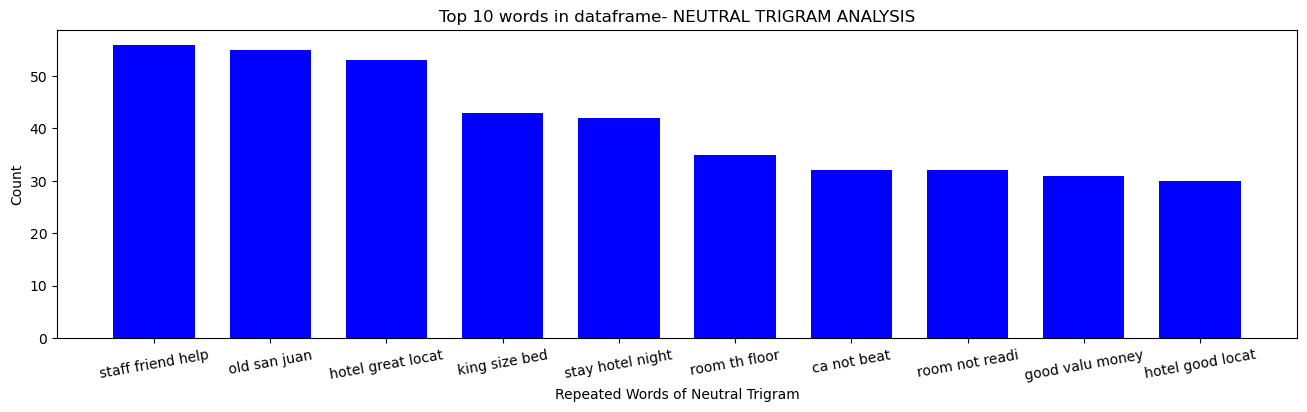

In [48]:
# Top 10 Neutral Tri-gram Words
plt.figure(figsize=(16,4))
plt.bar(Neutral_Trigram['Trigram'],Neutral_Trigram['Freq'], color ='blue',
        width = 0.7)
plt.xlabel("Repeated Words of Neutral Trigram")
plt.ylabel("Count")
plt.title("Top 10 words in dataframe- NEUTRAL TRIGRAM ANALYSIS")
plt.xticks(rotation = 10)
plt.show()

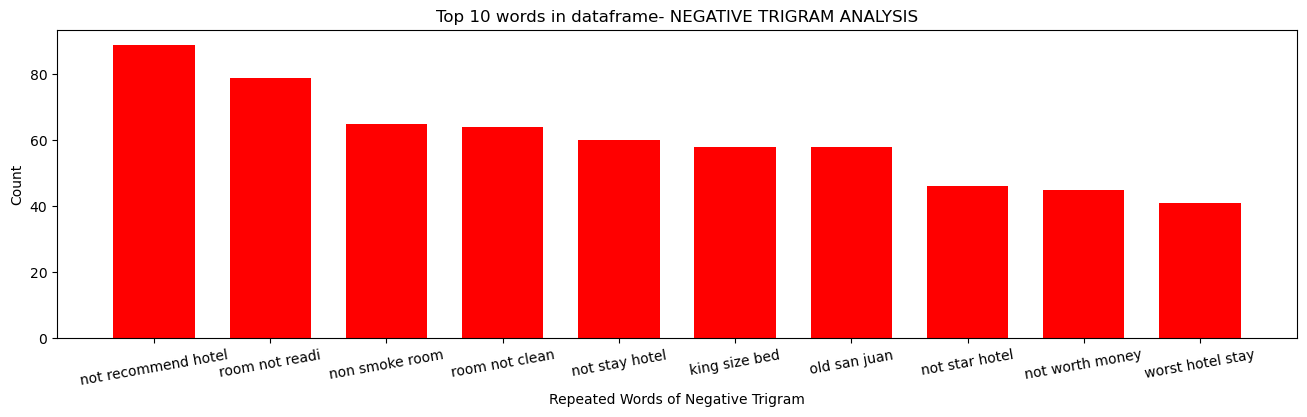

In [49]:
# Top 10 Negative Tri-gram Words
plt.figure(figsize=(16,4))
plt.bar(Negative_Trigram['Trigram'],Negative_Trigram['Freq'], color ='Red',
        width = 0.7)
plt.xlabel("Repeated Words of Negative Trigram")
plt.ylabel("Count")
plt.title("Top 10 words in dataframe- NEGATIVE TRIGRAM ANALYSIS")
plt.xticks(rotation = 10)
plt.show()

## Vader Sentiment

In [50]:
# function to print sentiments of the sentence Using Sentiment Intensity Analyzer.
def sentiment_scores(sentence):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
    print("Overall sentiment dictionary is : ", sentiment_dict)
    print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
    print("Sentence Overall Rated As", end = " ")
    if sentiment_dict['compound'] >= 0.05 :
        print("Positive")
    elif sentiment_dict['compound'] <= - 0.05 :
        print("Negative")
    else :
        print("Neutral")

In [51]:
# function calling
sentence1 = (Review['Text'])[0]
sentiment_scores(sentence1)

Overall sentiment dictionary is :  {'neg': 0.06, 'neu': 0.687, 'pos': 0.253, 'compound': 0.9638}
sentence was rated as  6.0 % Negative
sentence was rated as  68.7 % Neutral
sentence was rated as  25.3 % Positive
Sentence Overall Rated As Positive


In [52]:
# function to print sentiments of the sentence.
def sentiment_scores_series(sentence):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
    if sentiment_dict['compound'] >= 0.05 :
        return("Positive")
    elif sentiment_dict['compound'] <= - 0.05 :
        return("Negative")
    else :
        return("Neutral")

In [53]:
Review['Vader_sents'] = Review['Text'].apply(lambda x: sentiment_scores_series(x))
Review

,Review,Rating,Text,Sentiment,Vader_sents
0,nice hotel expensive parking got good deal sta...,4,nice hotel expens park got good deal stay hote...,Positive,Positive
1,ok nothing special charge diamond member hilto...,2,ok noth special charg diamond member hilton de...,Negative,Positive
2,nice rooms not 4* experience hotel monaco seat...,3,nice room not experi hotel monaco seattl good ...,Neutral,Positive
3,"unique, great stay, wonderful time hotel monac...",5,uniqu great stay wonder time hotel monaco loca...,Positive,Positive
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...,Positive,Positive
...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,best kept secret rd time stay charm not star c...,Positive,Positive
20487,great location price view hotel great quick pl...,4,great locat price view hotel great quick place...,Positive,Positive
20488,"ok just looks nice modern outside, desk staff ...",2,ok look nice modern outsid desk staff not part...,Negative,Positive
20489,hotel theft ruined vacation hotel opened sept ...,1,hotel theft ruin vacat hotel open sept guest w...,Negative,Positive


In [54]:
# Count Value of Original Sentiment.
Review['Sentiment'].value_counts()

Positive    15093
Negative     3214
Neutral      2184
Name: Sentiment, dtype: int64

In [55]:
# Count Value of Vader Sentiment.
Review['Vader_sents'].value_counts()

Positive    19104
Negative     1271
Neutral       116
Name: Vader_sents, dtype: int64

In [56]:
# Accuracy Score, Classification Report and Confusion matrix between Orignal and Vader Sentiments. 
acc = accuracy_score(Review['Sentiment'], Review['Vader_sents'])
cr = classification_report(Review['Sentiment'], Review['Vader_sents'])
cm = confusion_matrix(Review['Sentiment'], Review['Vader_sents'])

In [57]:
acc

0.7799033722121907

In [58]:
print(cr)

              precision    recall  f1-score   support

    Negative       0.80      0.32      0.46      3214
     Neutral       0.12      0.01      0.01      2184
    Positive       0.78      0.99      0.87     15093

    accuracy                           0.78     20491
   macro avg       0.57      0.44      0.45     20491
weighted avg       0.72      0.78      0.72     20491



[[ 1021    72  2121]
 [  133    14  2037]
 [  117    30 14946]]


<AxesSubplot:>

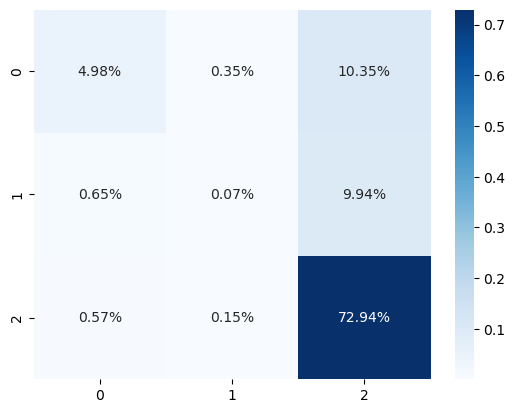

In [59]:
print(cm)
sns.heatmap(cm/np.sum(cm), fmt='.2%', annot=True, cmap='Blues')

## Count Vectorization

In [60]:
count_vect = CountVectorizer()
co_fit = count_vect.fit(Review['Text'])
X1 = count_vect.fit_transform(Review['Text'])

In [61]:
print(co_fit.vocabulary_)

{'nice': 21482, 'hotel': 15344, 'expens': 11318, 'park': 23240, 'got': 13763, 'good': 13679, 'deal': 8396, 'stay': 30236, 'anniversari': 1361, 'arriv': 1888, 'late': 17954, 'even': 11006, 'took': 32465, 'advic': 459, 'previous': 24846, 'review': 26721, 'valet': 34182, 'check': 5989, 'quick': 25448, 'easi': 10050, 'littl': 18481, 'disappoint': 9169, 'non': 21695, 'exist': 11278, 'view': 34495, 'room': 27111, 'clean': 6502, 'size': 28986, 'bed': 3199, 'comfort': 6922, 'woke': 35629, 'stiff': 30350, 'neck': 21279, 'high': 14965, 'pillow': 23989, 'not': 21774, 'soundproof': 29620, 'like': 18344, 'heard': 14712, 'music': 21012, 'night': 21534, 'morn': 20723, 'loud': 18778, 'bang': 2695, 'door': 9593, 'open': 22411, 'close': 6613, 'hear': 14709, 'peopl': 23609, 'talk': 31289, 'hallway': 14388, 'mayb': 19699, 'noisi': 21678, 'neighbor': 21337, 'aveda': 2308, 'bath': 2936, 'product': 25011, 'goldfish': 13643, 'touch': 32564, 'taken': 31275, 'advantag': 438, 'longer': 18699, 'locat': 18590, 'gr

In [62]:
print(X1.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## TF-IDF Vectorization

In [63]:
tf_vect = TfidfVectorizer()
tf_fit = tf_vect.fit(Review['Text'])
X2 = tf_vect.fit_transform(Review['Text'])

In [64]:
print(tf_fit.vocabulary_)

{'nice': 21482, 'hotel': 15344, 'expens': 11318, 'park': 23240, 'got': 13763, 'good': 13679, 'deal': 8396, 'stay': 30236, 'anniversari': 1361, 'arriv': 1888, 'late': 17954, 'even': 11006, 'took': 32465, 'advic': 459, 'previous': 24846, 'review': 26721, 'valet': 34182, 'check': 5989, 'quick': 25448, 'easi': 10050, 'littl': 18481, 'disappoint': 9169, 'non': 21695, 'exist': 11278, 'view': 34495, 'room': 27111, 'clean': 6502, 'size': 28986, 'bed': 3199, 'comfort': 6922, 'woke': 35629, 'stiff': 30350, 'neck': 21279, 'high': 14965, 'pillow': 23989, 'not': 21774, 'soundproof': 29620, 'like': 18344, 'heard': 14712, 'music': 21012, 'night': 21534, 'morn': 20723, 'loud': 18778, 'bang': 2695, 'door': 9593, 'open': 22411, 'close': 6613, 'hear': 14709, 'peopl': 23609, 'talk': 31289, 'hallway': 14388, 'mayb': 19699, 'noisi': 21678, 'neighbor': 21337, 'aveda': 2308, 'bath': 2936, 'product': 25011, 'goldfish': 13643, 'touch': 32564, 'taken': 31275, 'advantag': 438, 'longer': 18699, 'locat': 18590, 'gr

In [65]:
print(X2.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [66]:
y = Review['Sentiment']

## Model Selection

In [67]:
# Spliting Dataset into Train Test Data.
X_train_count_org, X_test_count_org, y_train_count_org, y_test_count_org = train_test_split(X1,y, test_size=0.25, random_state=42)
X_train_tfidf_org, X_test_tfidf_org, y_train_tfidf_org, y_test_tfidf_org = train_test_split(X2,y, test_size=0.25, random_state=42)

In [68]:
# Function for run types of machine learning model with Accuracy Score, Confusion matrix, Classification Report.
def predict(model, xtrain, xtest, ytrain, ytest):
    model = model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    trainac = model.score(xtrain, ytrain)
    testac = model.score(xtest, ytest)
    
    print(f"Train accuracy {trainac}\nTest accuracy {testac}")
    
    print(classification_report(ytest, ypred))
    
    print(confusion_matrix(ytest, ypred))

## Model Building with Count Vectorization

In [69]:
# Random Forest Classifier
predict(RandomForestClassifier(), X_train_count_org, X_test_count_org, y_train_count_org, y_test_count_org)

Train accuracy 1.0
Test accuracy 0.7887956275619754
              precision    recall  f1-score   support

    Negative       0.94      0.32      0.48       795
     Neutral       0.00      0.00      0.00       541
    Positive       0.78      1.00      0.88      3787

    accuracy                           0.79      5123
   macro avg       0.57      0.44      0.45      5123
weighted avg       0.72      0.79      0.72      5123

[[ 258    0  537]
 [  12    0  529]
 [   4    0 3783]]


In [70]:
# Support Vector Classifier
predict(SVC(), X_train_count_org, X_test_count_org, y_train_count_org, y_test_count_org)

Train accuracy 0.9237376366475794
Test accuracy 0.8496974429045481
              precision    recall  f1-score   support

    Negative       0.77      0.73      0.75       795
     Neutral       0.55      0.09      0.15       541
    Positive       0.87      0.98      0.92      3787

    accuracy                           0.85      5123
   macro avg       0.73      0.60      0.61      5123
weighted avg       0.82      0.85      0.81      5123

[[ 579   29  187]
 [ 123   48  370]
 [  50   11 3726]]


In [71]:
# Multinomial Naive Bayes
predict(MultinomialNB(), X_train_count_org, X_test_count_org, y_train_count_org, y_test_count_org)

Train accuracy 0.8886647579385737
Test accuracy 0.8385711497169627
              precision    recall  f1-score   support

    Negative       0.75      0.75      0.75       795
     Neutral       0.32      0.09      0.14       541
    Positive       0.87      0.96      0.92      3787

    accuracy                           0.84      5123
   macro avg       0.65      0.60      0.60      5123
weighted avg       0.80      0.84      0.81      5123

[[ 593   55  147]
 [ 114   49  378]
 [  84   49 3654]]


In [72]:
# Adaptive Boosting Classifier
predict(AdaBoostClassifier(), X_train_count_org, X_test_count_org, y_train_count_org, y_test_count_org)

Train accuracy 0.8284096824570536
Test accuracy 0.8170993558461839
              precision    recall  f1-score   support

    Negative       0.69      0.64      0.67       795
     Neutral       0.39      0.11      0.17       541
    Positive       0.85      0.96      0.90      3787

    accuracy                           0.82      5123
   macro avg       0.65      0.57      0.58      5123
weighted avg       0.78      0.82      0.79      5123

[[ 511   32  252]
 [ 113   57  371]
 [ 113   56 3618]]


In [73]:
# Gradient Boosting Classifier
predict(GradientBoostingClassifier(), X_train_count_org, X_test_count_org, y_train_count_org, y_test_count_org)

Train accuracy 0.851314419573139
Test accuracy 0.8254928752683974
              precision    recall  f1-score   support

    Negative       0.80      0.58      0.67       795
     Neutral       0.49      0.11      0.18       541
    Positive       0.84      0.98      0.90      3787

    accuracy                           0.83      5123
   macro avg       0.71      0.56      0.59      5123
weighted avg       0.80      0.83      0.79      5123

[[ 459   31  305]
 [  66   61  414]
 [  46   32 3709]]


In [74]:
# Bagging Classifier with Logistic Regression
predict(BaggingClassifier(base_estimator=LogisticRegression()), X_train_count_org, X_test_count_org, y_train_count_org, y_test_count_org)

Train accuracy 0.9746876626756897
Test accuracy 0.8440366972477065
              precision    recall  f1-score   support

    Negative       0.77      0.74      0.76       795
     Neutral       0.37      0.30      0.33       541
    Positive       0.91      0.94      0.93      3787

    accuracy                           0.84      5123
   macro avg       0.68      0.66      0.67      5123
weighted avg       0.83      0.84      0.84      5123

[[ 588  113   94]
 [ 122  162  257]
 [  50  163 3574]]


## Model Building with TF-IDF Vectorization

In [75]:
# Random Forest Classifier
predict(RandomForestClassifier(), X_train_tfidf_org, X_test_tfidf_org, y_train_tfidf_org, y_test_tfidf_org)

Train accuracy 1.0
Test accuracy 0.7940659769666211
              precision    recall  f1-score   support

    Negative       0.93      0.36      0.52       795
     Neutral       0.00      0.00      0.00       541
    Positive       0.79      1.00      0.88      3787

    accuracy                           0.79      5123
   macro avg       0.57      0.45      0.47      5123
weighted avg       0.73      0.79      0.73      5123

[[ 284    0  511]
 [  17    0  524]
 [   3    0 3784]]


In [76]:
# Support Vector Classifier
predict(SVC(), X_train_tfidf_org, X_test_tfidf_org, y_train_tfidf_org, y_test_tfidf_org)

Train accuracy 0.9716944299843832
Test accuracy 0.8612141323443295
              precision    recall  f1-score   support

    Negative       0.80      0.78      0.79       795
     Neutral       0.55      0.11      0.18       541
    Positive       0.88      0.98      0.93      3787

    accuracy                           0.86      5123
   macro avg       0.74      0.63      0.64      5123
weighted avg       0.83      0.86      0.83      5123

[[ 623   32  140]
 [ 117   60  364]
 [  41   17 3729]]


In [77]:
# Multinomial Naive Bayes
predict(MultinomialNB(), X_train_tfidf_org, X_test_tfidf_org, y_train_tfidf_org, y_test_tfidf_org)

Train accuracy 0.7396538261322227
Test accuracy 0.7413624829201639
              precision    recall  f1-score   support

    Negative       1.00      0.01      0.03       795
     Neutral       0.00      0.00      0.00       541
    Positive       0.74      1.00      0.85      3787

    accuracy                           0.74      5123
   macro avg       0.58      0.34      0.29      5123
weighted avg       0.70      0.74      0.63      5123

[[  11    0  784]
 [   0    0  541]
 [   0    0 3787]]


In [78]:
# Adaptive Boosting Classifier
predict(AdaBoostClassifier(), X_train_tfidf_org, X_test_tfidf_org, y_train_tfidf_org, y_test_tfidf_org)

Train accuracy 0.8312077043206664
Test accuracy 0.8301776302947492
              precision    recall  f1-score   support

    Negative       0.70      0.68      0.69       795
     Neutral       0.50      0.16      0.25       541
    Positive       0.87      0.96      0.91      3787

    accuracy                           0.83      5123
   macro avg       0.69      0.60      0.62      5123
weighted avg       0.80      0.83      0.81      5123

[[ 542   41  212]
 [ 118   89  334]
 [ 117   48 3622]]


In [79]:
# Gradient Boosting Classifier
predict(GradientBoostingClassifier(), X_train_tfidf_org, X_test_tfidf_org, y_train_tfidf_org, y_test_tfidf_org)

Train accuracy 0.8593831337844873
Test accuracy 0.8252976771422994
              precision    recall  f1-score   support

    Negative       0.80      0.58      0.67       795
     Neutral       0.46      0.13      0.20       541
    Positive       0.84      0.98      0.90      3787

    accuracy                           0.83      5123
   macro avg       0.70      0.56      0.59      5123
weighted avg       0.79      0.83      0.79      5123

[[ 460   41  294]
 [  67   68  406]
 [  47   40 3700]]


In [80]:
# Bagging Classifier with Logistic Regression
predict(BaggingClassifier(base_estimator=LogisticRegression()), X_train_tfidf_org, X_test_tfidf_org, y_train_tfidf_org, y_test_tfidf_org)

Train accuracy 0.8992061426340447
Test accuracy 0.8584813585789577
              precision    recall  f1-score   support

    Negative       0.80      0.76      0.78       795
     Neutral       0.50      0.18      0.26       541
    Positive       0.89      0.98      0.93      3787

    accuracy                           0.86      5123
   macro avg       0.73      0.64      0.66      5123
weighted avg       0.83      0.86      0.84      5123

[[ 607   48  140]
 [ 111   95  335]
 [  43   48 3696]]


In [81]:
# Light GBM Classifier
predict(LGBMClassifier(), X_train_tfidf_org, X_test_tfidf_org, y_train_tfidf_org, y_test_tfidf_org)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.091644 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 242539
[LightGBM] [Info] Number of data points in the train set: 15368, number of used features: 4015
[LightGBM] [Info] Start training from score -1.848933
[LightGBM] [Info] Start training from score -2.235764
[LightGBM] [Info] Start training from score -0.306954
Train accuracy 0.9731910463300364
Test accuracy 0.8532110091743119
              precision    recall  f1-score   support

    Negative       0.81      0.73      0.76       795
     Neutral       0.48      0.23      0.31       541
    Positive       0.88      0.97      0.92      3787

    accuracy                           0.85      5123
   macro avg       0.72      0.64      0.67      5123
weighted avg       0.83      0.85      0.83      5123

[[ 577   63  155]
 [  93  122  326]
 [  46   69 3672]]
